In [1]:
#!pip install tensorflow pandas matplotlib scikit-learn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df[df['toxic']==1].head() # this shows only toxic comments when we do toxic==1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [9]:
#fetching the columns from index 2 till end
df[df.columns[2:]] 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [10]:
# fetching the columns from index 2 till end of row 3
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [11]:
# np.expand_dims??  -> If you write in this way this will give the full defination of what it is

In [12]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

# Pre-Process

In [13]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
add-trailing-comma            2.4.0
aiofiles                      23.1.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
altair                        5.0.1
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
autoflake                     1.5.3
Automat                       20.2.0
autopep8                      1.6.0
Babel    

In [14]:
from tensorflow.keras.layers import TextVectorization

In [15]:
# TextVectorization??

In [16]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [17]:
df.columns # x can also be written as this value gets stored in x

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [18]:
df[df.columns[2:]].values  # y can also be written as this value gets stored in y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [19]:
MAX_FEATURES = 200000 # number of words in the vocab

In [20]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [21]:
vectorizer.adapt(X.values) # adapt will learn all the words inside the vocabulary

In [22]:
len(X)

159571

In [23]:
#vectorized_text

In [24]:
vectorized_text = vectorizer(X.values)

In [25]:
# MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks


In [26]:
dataset.as_numpy_iterator().next() # This gives 1 Batch (Text in its vectorized format and labels)

(array([[  917,   635,   179, ...,     0,     0,     0],
        [31129,     5,    42, ...,     0,     0,     0],
        [   48,   361,   158, ...,     0,     0,     0],
        ...,
        [   62,    60,  1493, ...,     0,     0,     0],
        [ 1515,     2, 40139, ...,     0,     0,     0],
        [   88,     7,    19, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [27]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [28]:
batch_X

array([[  14,    9,   15, ...,    0,    0,    0],
       [  46,  276,  837, ...,    0,    0,    0],
       [1946, 4171,    2, ...,    0,    0,    0],
       ...,
       [   1,   46,  168, ...,    0,    0,    0],
       [   9,   14,   21, ...,    0,    0,    0],
       [   1, 7055,    0, ...,    0,    0,    0]], dtype=int64)

In [29]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [30]:
batch_X.shape

(16, 1800)

In [31]:
batch_y.shape

(16, 6)

In [32]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [33]:
train_generator = train.as_numpy_iterator()

In [34]:
train_generator.next() # this will progressively give the next batch if we continuously run this cell.

(array([[    73,   2357,      7, ...,      0,      0,      0],
        [109357,    277,     10, ...,      0,      0,      0],
        [  1738,    109,     11, ...,      0,      0,      0],
        ...,
        [     2,   3219,   3995, ...,      0,      0,      0],
        [  2469,  88981,    797, ...,      0,      0,      0],
        [  5273,   1408,      4, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# Sequential Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [36]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
# 32 differernt LSTM units
# The reason tanh is used over here is because the GPU acceleration that is required for LSTM layer needs to be tanh (This is mentioned by Tensorflow)
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers 
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [37]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [39]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 12092s 2s/step - loss: 0.0643 - val_loss: 0.0470


In [40]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

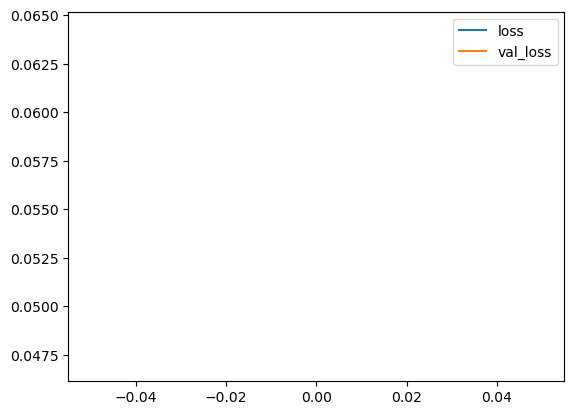

In [41]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Making Predictions

In [42]:
batch = test.as_numpy_iterator().next()

In [43]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [44]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0], dtype=int64)>

In [45]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 960ms/step


In [46]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [47]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [48]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 176ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [49]:
res.shape

(1, 6)

# Evaluate Model

In [50]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [52]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - 0s 368ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 374ms/step


1/1 [==============================] - 0s 365ms/step


1/1 [==============================] - 0s 412ms/step


In [53]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8686826825141907, Recall:0.5885489583015442, Accuracy:0.49548646807670593


# Test & Gradio

In [54]:
#!pip install Jinja2

In [55]:
#pip install gradio

In [56]:
#!pip install gradio jinja2

In [57]:
import tensorflow as tf
import gradio as gr

In [58]:
model.save('toxicity.h5')

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
model = tf.keras.models.load_model('toxicity.h5')

In [60]:
input_str = vectorizer('hey i freaken hate you!')

In [61]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 3s 3s/step


In [62]:
res

array([[0.86278224, 0.03596205, 0.41206944, 0.02641629, 0.44398248,
        0.10969508]], dtype=float32)

In [63]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [64]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3192\2358991581.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\KIIT\AppData\Local\Temp\ipykernel_3192\2358991581.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\KIIT\AppData\Local\Temp\ipykernel_3192\2358991581.py:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [ ]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
1/1 [==============================] - 0s 150ms/step
